In [1]:
# Importing Necessary Libraries
import pandas as pd

# Loading DataSet
df = pd.read_csv("IMDB Dataset.csv")
# viewing head of DataSet
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# Basic Inspection of Data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [3]:
# Understanding Data
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
# Checking Target Distribution 
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
# Checking Missing Values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
# Converting Targets to Numeric
df['sentiment'] = df['sentiment'].map({
    'positive': 1,
    'negative': 0
})

In [7]:
# Text Cleaning Pipeline
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_review'] = df['review'].apply(preprocess)

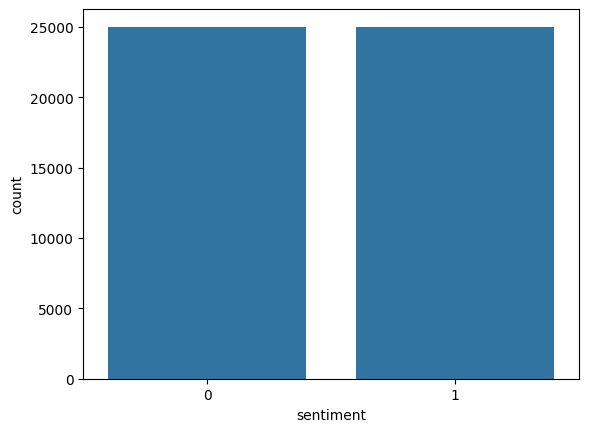

In [8]:
# Sentiment Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.show()

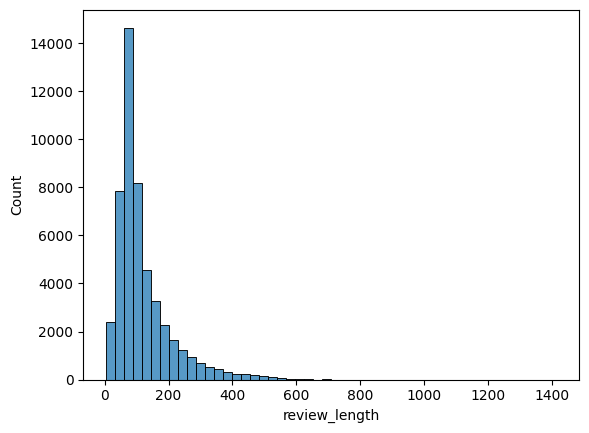

In [9]:
# Review Length Analysis
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

sns.histplot(df['review_length'], bins=50)
plt.show()

In [25]:
# Feature Engineering
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Classification Reports
from sklearn.metrics import classification_report

print("Logistic Regression")
print(classification_report(y_test, lr.predict(X_test)))

print("Naive Bayes")
print(classification_report(y_test, nb.predict(X_test)))

print("Random Forest")
print(classification_report(y_test, rf.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Naive Bayes
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85     

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": lr,
    "Naive Bayes": nb,
    "Random Forest": rf
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8864,0.876519,0.901568,0.888867
1,Naive Bayes,0.8514,0.847176,0.860290,0.853683
2,Random Forest,0.8487,0.854728,0.843024,0.848836


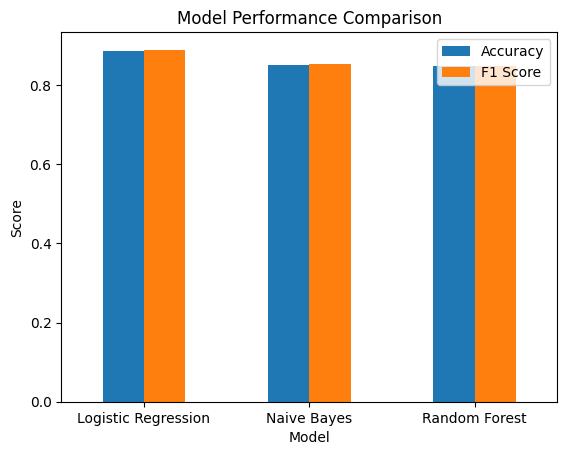

In [32]:
# Visual Comparision
import matplotlib.pyplot as plt

results_df.set_index("Model")[["Accuracy","F1 Score"]].plot(kind="bar")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

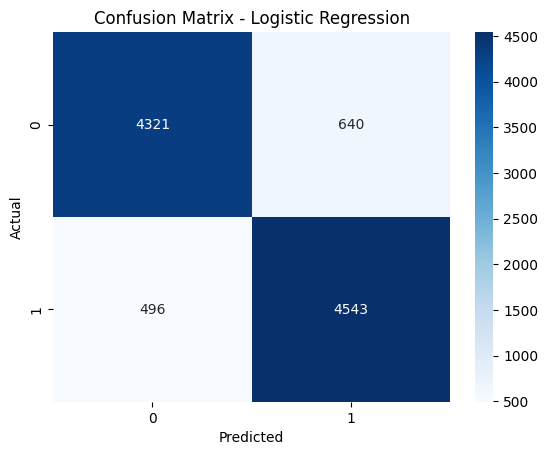

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

best_model = lr  # assuming LR performs best

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [36]:
# To understand Top Positive and Negative Words
feature_names = tfidf.get_feature_names_out()
coefficients = lr.coef_[0]

top_positive = sorted(zip(coefficients, feature_names), reverse=True)[:10]
top_negative = sorted(zip(coefficients, feature_names))[:10]

print("Top Positive Words:", top_positive)
print("Top Negative Words:", top_negative)

Top Positive Words: [(np.float64(6.983694129258071), 'great'), (np.float64(6.770338188179189), 'excel'), (np.float64(5.321375466434512), 'perfect'), (np.float64(5.232027820277775), 'enjoy'), (np.float64(4.763533041802285), 'brilliant'), (np.float64(4.720462477275713), 'best'), (np.float64(4.607714753515494), 'love'), (np.float64(4.488617754598532), 'amaz'), (np.float64(4.415645609062018), 'favorit'), (np.float64(4.294716332346028), 'hilari')]
Top Negative Words: [(np.float64(-10.060789507760566), 'worst'), (np.float64(-8.853509252783775), 'wast'), (np.float64(-7.785316240096129), 'aw'), (np.float64(-7.193129879717309), 'bad'), (np.float64(-7.058795201028175), 'bore'), (np.float64(-6.050484588359595), 'poor'), (np.float64(-5.96157486971973), 'terribl'), (np.float64(-5.573738916390167), 'disappoint'), (np.float64(-5.265019036240903), 'noth'), (np.float64(-5.118765312453195), 'fail')]


In [37]:
# Model Optimization
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Score: 0.8860385829749436


In [38]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [39]:
# Model Serialization (Production Step)
import pickle

pickle.dump(best_model, open("sentiment_model.pkl", "wb"))
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))

model = pickle.load(open("sentiment_model.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

sample = ["This movie was absolutely fantastic"]
vec = vectorizer.transform(sample)
print(model.predict(vec))

[1]


In [40]:
# here is how to know your .pkl files location 
import os
os.getcwd()

'C:\\Users\\HOME'